In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/shortlikeafox/ultimate_ufc_dataset/refs/heads/main/ufc-master.csv')

In [66]:
df.shape

(6541, 118)

In [67]:
df.head()

,RedFighter,BlueFighter,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,Date,Location,Country,Winner,...,FinishDetails,FinishRound,FinishRoundTime,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
0,Colby Covington,Joaquin Buckley,205.0,-250.0,205.0000,40.0000,2024-12-14,"Tampa, Florida, USA",USA,Blue,...,NaN,3.0,4:42,882.0,300.0,175.0,1800.0,2000.0,1100.0,150.0
1,Cub Swanson,Billy Quarantillo,124.0,-148.0,124.0000,67.5676,2024-12-14,"Tampa, Florida, USA",USA,Red,...,Punch,3.0,1:36,696.0,250.0,NaN,1800.0,NaN,450.0,NaN
2,Manel Kape,Bruno Silva,-395.0,310.0,25.3165,310.0000,2024-12-14,"Tampa, Florida, USA",USA,Red,...,Punches,3.0,1:57,717.0,-105.0,550.0,900.0,1800.0,225.0,1100.0
3,Vitor Petrino,Dustin Jacoby,-340.0,270.0,29.4118,270.0000,2024-12-14,"Tampa, Florida, USA",USA,Blue,...,Punch,3.0,3:44,824.0,240.0,500.0,550.0,3000.0,110.0,800.0
4,Adrian Yanez,Daniel Marcos,185.0,-225.0,185.0000,44.4444,2024-12-14,"Tampa, Florida, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,150.0,2200.0,2200.0,450.0,200.0


In [161]:
df['RedFighter'].value_counts().head(5)

RedFighter
Jim Miller        29
Donald Cerrone    24
Neil Magny        23
Derrick Lewis     22
Dustin Poirier    22
Name: count, dtype: int64

In [162]:
df['BlueFighter'].value_counts().head(5)

BlueFighter
Angela Hill           18
Charles Oliveira      18
Rafael Dos Anjos      16
Jeremy Stephens       16
Gerald Meerschaert    15
Name: count, dtype: int64

In [68]:
for col in df.columns:
    print(f'{col} - {df[col].dtype}')

RedFighter - object
BlueFighter - object
RedOdds - float64
BlueOdds - float64
RedExpectedValue - float64
BlueExpectedValue - float64
Date - object
Location - object
Country - object
Winner - object
TitleBout - bool
WeightClass - object
Gender - object
NumberOfRounds - int64
BlueCurrentLoseStreak - int64
BlueCurrentWinStreak - int64
BlueDraws - int64
BlueAvgSigStrLanded - float64
BlueAvgSigStrPct - float64
BlueAvgSubAtt - float64
BlueAvgTDLanded - float64
BlueAvgTDPct - float64
BlueLongestWinStreak - int64
BlueLosses - int64
BlueTotalRoundsFought - int64
BlueTotalTitleBouts - int64
BlueWinsByDecisionMajority - int64
BlueWinsByDecisionSplit - int64
BlueWinsByDecisionUnanimous - int64
BlueWinsByKO - int64
BlueWinsBySubmission - int64
BlueWinsByTKODoctorStoppage - int64
BlueWins - int64
BlueStance - object
BlueHeightCms - float64
BlueReachCms - float64
BlueWeightLbs - int64
RedCurrentLoseStreak - int64
RedCurrentWinStreak - int64
RedDraws - int64
RedAvgSigStrLanded - float64
RedAvgSigStrPc

In [15]:
df.describe()

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds
count,6314.000000,6315.000000,6314.000000,6315.000000,6541.000000,6541.000000,6541.000000,6541.000000,5611.000000,5776.000000,...,131.000000,67.000000,5919.000000,5919.000000,5454.000000,5424.000000,5205.000000,5181.000000,5207.000000,5180.000000
mean,-115.879157,59.928424,96.627469,165.142778,3.185446,0.501452,0.959028,0.023238,19.806700,0.453130,...,8.435115,9.194030,2.424565,657.681534,307.993583,425.889565,885.041883,1102.388149,510.834646,636.803475
std,277.304217,253.143686,85.866050,137.740376,0.577357,0.794595,1.408093,0.156641,20.304934,0.110706,...,4.302234,4.352773,1.007413,360.189073,250.763470,325.849478,602.294651,672.652311,426.532260,465.316626
min,-2100.000000,-1200.000000,4.761900,8.333300,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,5.000000,-440.000000,-200.000000,-370.000000,-1250.000000,-550.000000,-400.000000
25%,-255.000000,-150.000000,39.215700,66.666700,3.000000,0.000000,0.000000,0.000000,3.880000,0.400000,...,5.000000,5.000000,1.000000,299.000000,170.000000,222.000000,440.000000,600.000000,225.000000,310.000000
50%,-150.000000,130.000000,66.666700,130.000000,3.000000,0.000000,0.000000,0.000000,9.000000,0.460000,...,8.000000,10.000000,3.000000,900.000000,250.000000,350.000000,750.000000,1000.000000,420.000000,525.000000
75%,130.000000,215.000000,130.000000,215.000000,3.000000,1.000000,1.000000,0.000000,32.666700,0.513000,...,12.000000,13.500000,3.000000,900.000000,400.000000,550.000000,1200.000000,1450.000000,700.000000,877.250000
max,775.000000,1300.000000,775.000000,1300.000000,5.000000,6.000000,12.000000,2.000000,154.000000,1.000000,...,15.000000,15.000000,5.000000,1500.000000,2400.000000,3000.000000,4665.000000,5000.000000,4000.000000,4000.000000


<Axes: xlabel='TotalFightTimeSecs'>

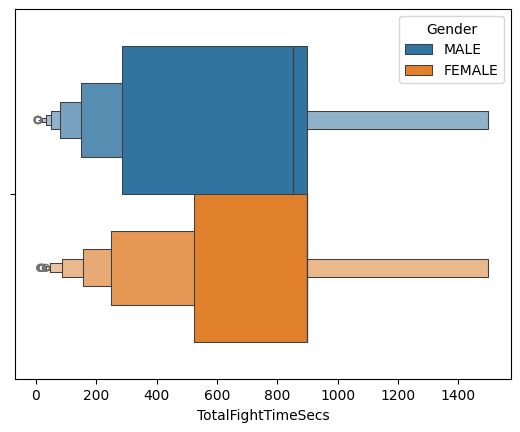

In [70]:
sns.boxenplot(x='TotalFightTimeSecs',data=df,hue='Gender')

<Axes: xlabel='BlueAvgSigStrPct', ylabel='Count'>

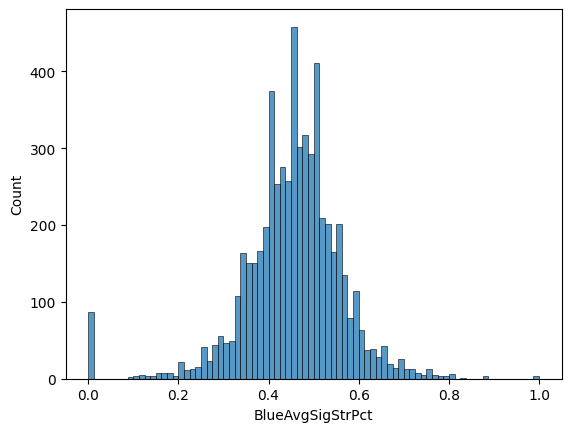

In [30]:
sns.histplot(x='BlueAvgSigStrPct',data=df)

<Axes: xlabel='RedAvgSigStrPct', ylabel='Count'>

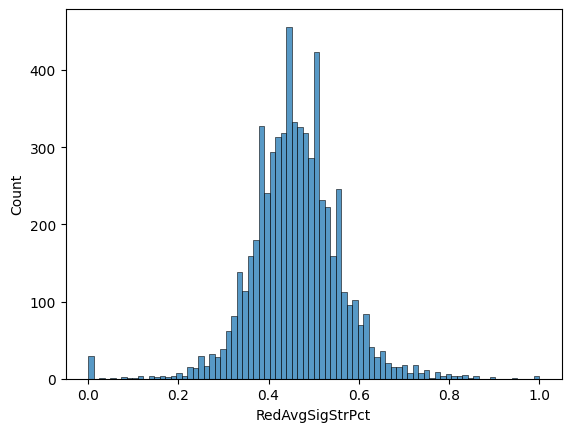

In [27]:
sns.histplot(x='RedAvgSigStrPct',data=df)

<Axes: xlabel='NumberOfRounds', ylabel='count'>

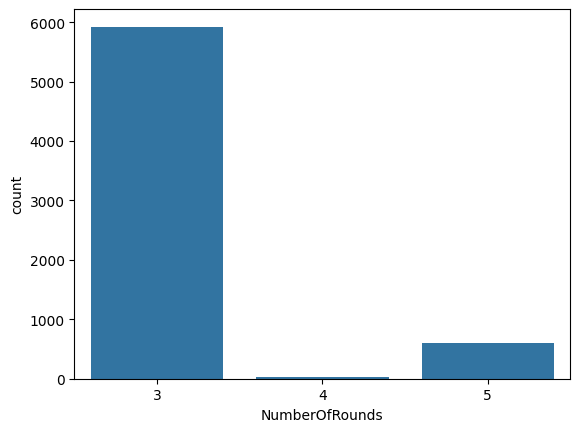

In [146]:
sns.countplot(x='NumberOfRounds',data=df)

In [150]:
df[df['Winner'] == 'Red'].groupby('RedFighter')['Winner'].count().reset_index().sort_values(by='Winner',ascending=False).head(10)

,RedFighter,Winner
525,Jim Miller,20
336,Dustin Poirier,19
322,Donald Cerrone,18
565,Jon Jones,17
780,Max Holloway,16
304,Derrick Lewis,16
857,Neil Magny,15
380,Francisco Trinaldo,15
583,Joseph Benavidez,14
243,Cub Swanson,14


In [151]:
df[df['Winner'] == 'Blue'].groupby('BlueFighter')['Winner'].count().reset_index().sort_values(by='Winner',ascending=False).head(10)

,BlueFighter,Winner
947,Rafael Dos Anjos,11
193,Charles Oliveira,11
1039,Sean Strickland,10
892,Nik Lentz,9
112,Belal Muhammad,9
421,Gerald Meerschaert,8
542,Jessica Andrade,8
672,Kevin Lee,8
117,Beneil Dariush,8
32,Alex Morono,8


In [158]:
df.groupby('FinishDetails')['NumberOfRounds'].agg(['count','mean']).reset_index().sort_values(by='mean',ascending=False).head(5)

,FinishDetails,count,mean
34,Straight Armbar,1,5.000000
13,Keylock,2,4.000000
33,Spinning Back Kick,8,3.500000
20,Neck Crank,11,3.363636
14,Kick,154,3.311688


<Axes: xlabel='BlueOdds', ylabel='RedOdds'>

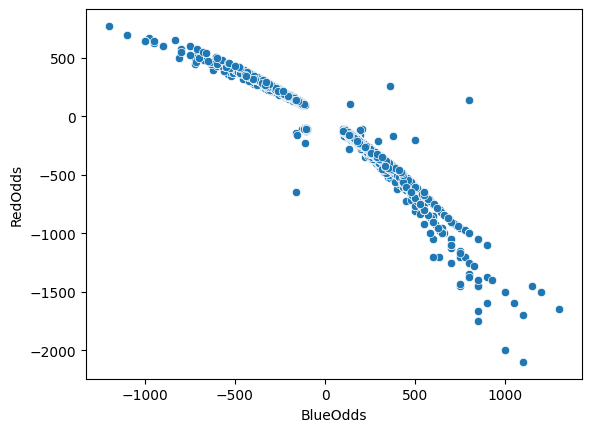

In [159]:
sns.scatterplot(x='BlueOdds',y='RedOdds',data=df)

In [163]:
df.groupby('Gender')['BlueHeightCms'].mean()

Gender
FEMALE    165.353051
MALE      179.560788
Name: BlueHeightCms, dtype: float64

In [32]:
df['Country'].value_counts().head(10)

Country
 USA                    2450
USA                     1907
 Brazil                  400
 Canada                  337
United Arab Emirates     204
 United Kingdom          165
 Australia               160
 Sweden                   72
 Mexico                   70
United Kingdom            69
Name: count, dtype: int64

In [33]:
df['BlueAge'].mean()

29.810579422106713

In [34]:
df['RedAge'].mean()

30.362941446262038

In [35]:
df['Finish'].value_counts()

Finish
U-DEC         2409
KO/TKO        2016
SUB           1157
S-DEC          655
M-DEC           46
DQ              18
Overturned       2
Name: count, dtype: int64

<Axes: xlabel='Finish', ylabel='TotalFightTimeSecs'>

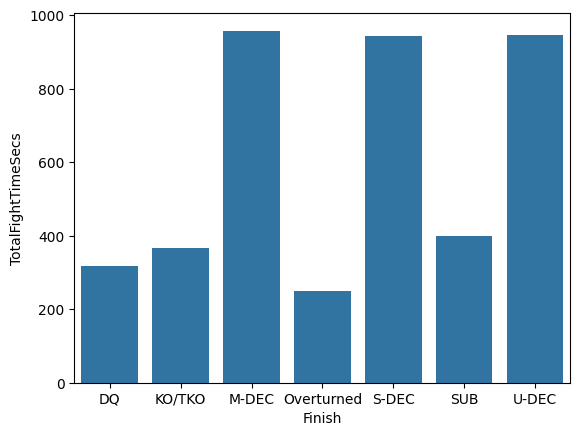

In [37]:
sns.barplot(data=df.groupby('Finish')['TotalFightTimeSecs'].mean().reset_index(),x='Finish',y='TotalFightTimeSecs')

<Axes: xlabel='BlueHeightCms', ylabel='Count'>

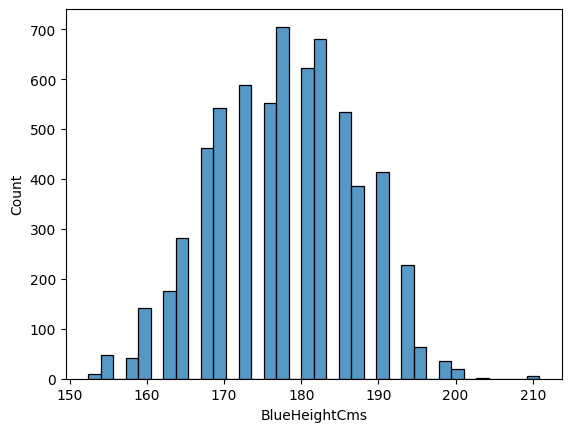

In [71]:
sns.histplot(x='BlueHeightCms',data=df)

<Axes: xlabel='RedHeightCms', ylabel='Count'>

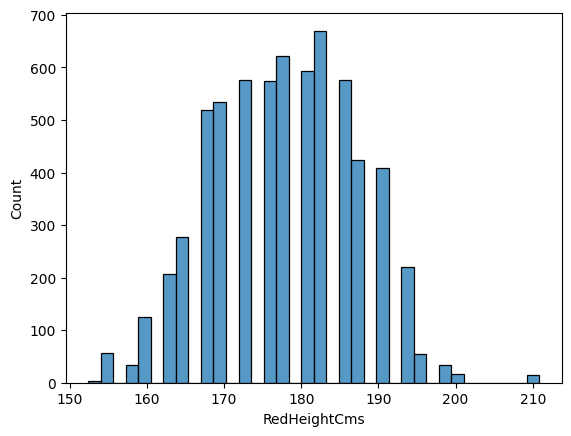

In [72]:
sns.histplot(x='RedHeightCms',data=df)

In [21]:
df['RedFighter'].nunique()

1662

In [22]:
df['BlueFighter'].nunique()

1922

In [24]:
df['Winner'].value_counts()

Winner
Red     3795
Blue    2746
Name: count, dtype: int64

In [54]:
corr = df.select_dtypes(include='number').corr()

In [175]:
corr

,RedOdds,BlueOdds,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,...,BPFPRank,FinishRound,TotalFightTimeSecs,RedDecOdds,BlueDecOdds,RSubOdds,BSubOdds,RKOOdds,BKOOdds,Winner_Label
RedOdds,1.000000,-0.961720,0.779254,-0.921644,-0.097498,-0.048900,0.092557,0.014047,0.013615,0.076711,...,-0.010220,-0.003878,0.007110,0.288924,-0.579469,0.275031,-0.347666,0.409651,-0.488583,-0.336196
BlueOdds,-0.961720,1.000000,-0.853785,0.873344,0.092295,0.057121,-0.105011,-0.013026,-0.001577,-0.082592,...,0.003979,0.011839,0.001559,-0.354189,0.520404,-0.310517,0.308434,-0.453611,0.449964,0.343878
RedExpectedValue,0.779254,-0.853785,1.000000,-0.558650,-0.067025,-0.072256,0.102963,-0.016183,0.044477,0.033689,...,-0.005825,-0.024922,-0.022421,0.456673,-0.311373,0.346717,-0.194583,0.492910,-0.306047,-0.308310
BlueExpectedValue,-0.921644,0.873344,-0.558650,1.000000,0.103738,0.019880,-0.072910,-0.037724,0.021119,-0.100559,...,0.004229,-0.003265,-0.017798,-0.181004,0.620314,-0.214725,0.360016,-0.322334,0.494153,0.307287
NumberOfRounds,-0.097498,0.092295,-0.067025,0.103738,1.000000,-0.089078,0.307081,0.040260,0.084480,0.111032,...,0.218767,0.224723,0.196058,0.127096,0.207383,0.058823,0.138642,-0.092231,-0.011550,0.017296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RSubOdds,0.275031,-0.310517,0.346717,-0.214725,0.058823,0.003141,0.139983,0.032465,-0.014558,0.154120,...,0.011357,0.027461,0.031827,0.364481,0.027481,1.000000,0.090434,0.249638,0.134883,-0.120652
BSubOdds,-0.347666,0.308434,-0.194583,0.360016,0.138642,0.037743,0.069522,0.014819,0.040284,0.127434,...,0.057192,0.033937,0.029694,0.114346,0.489854,0.090434,1.000000,0.141747,0.363950,0.120760
RKOOdds,0.409651,-0.453611,0.492910,-0.322334,-0.092231,-0.046801,0.085595,0.028100,0.052877,0.087938,...,-0.005411,0.032306,0.050823,0.194298,-0.189508,0.249638,0.141747,1.000000,0.070800,-0.158233
BKOOdds,-0.488583,0.449964,-0.306047,0.494153,-0.011550,0.039904,-0.022747,0.019335,0.011595,0.014501,...,-0.003244,0.026636,0.034337,-0.126906,0.377547,0.134883,0.363950,0.070800,1.000000,0.151125


<Axes: >

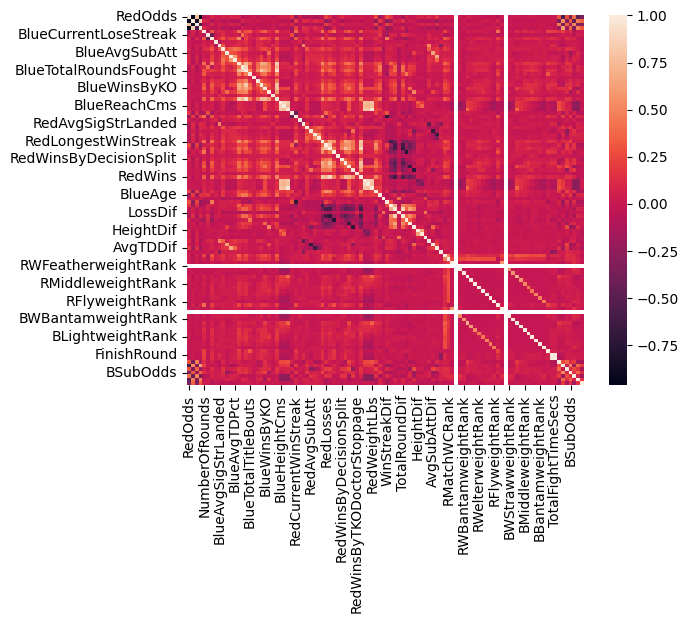

In [176]:
sns.heatmap(corr)

In [73]:
corrdf = corr['Winner_Label']

In [109]:
corrdf.reset_index().sort_values(by='Winner_Label',ascending=False).head(11)

,index,Winner_Label
103,Winner_Label,1.000000
1,BlueOdds,0.343878
3,BlueExpectedValue,0.307287
98,BlueDecOdds,0.188319
102,BKOOdds,0.151125
100,BSubOdds,0.120760
50,BlueAge,0.106701
28,RedCurrentWinStreak,0.074654
33,RedAvgTDLanded,0.073219
56,TotalRoundDif,0.067057


In [61]:
corrdf.reset_index().sort_values(by='Winner_Label',ascending=False).tail(10)

,index,Winner_Label
65,AvgTDDif,-0.110312
49,RedAge,-0.117882
99,RSubOdds,-0.120652
52,WinStreakDif,-0.122693
97,RedDecOdds,-0.135925
101,RKOOdds,-0.158233
2,RedExpectedValue,-0.308310
0,RedOdds,-0.336196
70,RWFeatherweightRank,NaN
83,BWFeatherweightRank,NaN


In [43]:
df.fillna(0, inplace=True)


In [75]:
df['WinnerLabel'] = np.where(df['Winner'] == 'Red',1,0)

In [87]:
X = df.select_dtypes(include='number').drop(columns=['WinnerLabel','RedOdds','BlueOdds','RedDecOdds',	'BlueDecOdds',	'RSubOdds',	'BSubOdds',	'RKOOdds',	'BKOOdds'])
y = df['WinnerLabel']

In [89]:
X.fillna(0,inplace=True)

In [90]:
X

,RedExpectedValue,BlueExpectedValue,NumberOfRounds,BlueCurrentLoseStreak,BlueCurrentWinStreak,BlueDraws,BlueAvgSigStrLanded,BlueAvgSigStrPct,BlueAvgSubAtt,BlueAvgTDLanded,...,BLightHeavyweightRank,BMiddleweightRank,BWelterweightRank,BLightweightRank,BFeatherweightRank,BBantamweightRank,BFlyweightRank,BPFPRank,FinishRound,TotalFightTimeSecs
0,205.0000,40.0000,5,0,5,0,4.1300,0.36,0.0000,1.9600,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,3.0,882.0
1,124.0000,67.5676,3,1,0,0,7.3600,0.56,1.1000,1.2400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,696.0
2,25.3165,310.0000,3,0,4,0,3.3200,0.48,0.2000,2.2600,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,3.0,717.0
3,29.4118,270.0000,3,2,0,1,5.5000,0.47,0.0000,0.3600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,824.0
4,185.0000,44.4444,3,0,4,0,5.9400,0.52,0.0000,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6536,64.5161,135.0000,3,0,0,0,0.0000,0.00,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0
6537,47.6190,175.0000,3,0,0,0,0.0000,0.00,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,121.0
6538,38.4615,220.0000,3,1,0,0,8.0000,0.34,1.0000,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0
6539,23.8095,335.0000,3,0,0,0,0.0000,0.00,0.0000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,900.0


In [93]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Apply RFE with logistic regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X, y)

print("Selected features:", X.columns[rfe.get_support()])

/Users/ryan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ryan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Selected features: Index(['BlueDraws', 'BlueWinsByDecisionSplit', 'RedAvgTDPct',
       'RedWinsByDecisionSplit', 'RedWinsByTKODoctorStoppage', 'RedAge',
       'BlueAge', 'WinStreakDif', 'AvgTDDif', 'BBantamweightRank'],
      dtype='object')


In [94]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
selected_columns = ['BlueOdds', 'BlueExpectedValue', 'BlueDecOdds',
       'BKOOdds', 'BSubOdds', 'BlueAge',
       'RedCurrentWinStreak', 'RedAvgTDLanded', 'TotalRoundDif', 'RedAvgTDPct','AvgTDDif','RedAge','RSubOdds','WinStreakDif','RedDecOdds','RKOOdds','RedExpectedValue',
       'RedOdds']

In [165]:
X = df[selected_columns]
y = df['WinnerLabel']

In [166]:
rfc = RandomForestClassifier()

In [167]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [168]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [169]:
preds = rfc.predict(x_test)

In [170]:
from sklearn import metrics

In [171]:
print(metrics.classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.49      0.59      0.54       451
           1       0.76      0.68      0.72       858

    accuracy                           0.65      1309
   macro avg       0.63      0.64      0.63      1309
weighted avg       0.67      0.65      0.66      1309



In [172]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.fillna(0)
,y_train.fillna(0)
)

/Users/ryan/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
preds = lr.predict(x_test.fillna(0))

In [174]:
print(metrics.classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.43      0.65      0.51       361
           1       0.83      0.67      0.74       948

    accuracy                           0.66      1309
   macro avg       0.63      0.66      0.63      1309
weighted avg       0.72      0.66      0.68      1309

